使用VGG16的结构提取图像特征，再根据特征建立mlp模型，实现猫狗图像识别。训练测试数据data/catdogs。
1. 对数据进行分离，计算测试数据预测准确率
2. 从网上下载猫狗图片，对其进行预测

mlp模型结构：一个隐藏层，10个神经元

In [26]:
# 构建VGG16模型，去除输出层，只保留卷积层

import tensorflow.keras as keras
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
model_vgg16 = VGG16(weights='imagenet', include_top=False)

In [28]:
from keras.preprocessing.image import load_img, img_to_array
import os
image_size = 224
feature_size = 25088
def modelProcess(img_path, model):
    img = load_img(img_path, target_size=(image_size, image_size))
    img_array = img_to_array(img)
    x = np.expand_dims(img_array, axis=0)
    x = preprocess_input(x)
    x_vgg = model.predict(x)
    x_vgg = x_vgg.reshape(1, feature_size)
    return x_vgg


def loadDataFromDir(dir,model,file_limit):
    dirs = os.listdir(dir)
    img_paths = []
    for d in dirs:
        if os.path.splitext(d)[1] == '.jpg':
            img_paths.append(dir + '/' + d)

    featrues_size = min(file_limit, len(img_paths))
    featrues = np.zeros([featrues_size, 25088])
    for i in range(featrues_size):
        feature = modelProcess(img_paths[i],model)
        featrues[i] = feature
        print("preprecessd:",img_paths[i])

    return featrues


In [29]:
sample_limit = 300
features1 = loadDataFromDir('data/catdogs/training_set/cats',model_vgg16,sample_limit)
features2 = loadDataFromDir('data/catdogs/training_set/dogs',model_vgg16,sample_limit)

y1 = np.zeros(len(features1))
y2 = np.ones(len(features2))
X_features = np.concatenate((features1, features2))
y_features = np.concatenate((y1, y2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 690ms/step
preprecessd: data/catdogs/training_set/cats/cat.0.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
preprecessd: data/catdogs/training_set/cats/cat.1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
preprecessd: data/catdogs/training_set/cats/cat.10.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
preprecessd: data/catdogs/training_set/cats/cat.100.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
preprecessd: data/catdogs/training_set/cats/cat.1000.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
preprecessd: data/catdogs/training_set/cats/cat.10000.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
preprecessd: data/catdogs/training_set/cats/cat.10001.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step
preprecessd: data/catdogs/training_set/cats/cat.10002.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step
preprecessd: data/catdogs/training_set/cats/cat.10003.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step
preprecessd: data/catdogs/training_set/cats/cat.10004.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step
prepr

In [31]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_features, test_size=0.3, random_state=50)

y_train_format = keras.utils.to_categorical(y_train, 2)
y_test_format = keras.utils.to_categorical(y_test, 2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(420, 25088) (180, 25088) (420,) (180,)


In [32]:
#set up the mpl model
from keras.models import Sequential
from keras.layers import Dense,Input

model = Sequential()
model.add(Input(shape=(25088,)))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='sigmoid'))
model.add(Dense(units=2,activation='softmax'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │       250,890 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 251,022 (980.55 KB)

 Trainable params: 251,022 (980.55 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
#configure the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#train the model
model.fit(X_train, y_train_format, epochs=20)

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7388 - loss: 0.6487
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9381 - loss: 0.5588 
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9747 - loss: 0.5101
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9700 - loss: 0.4794
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9967 - loss: 0.4446 
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9953 - loss: 0.4335
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9941 - loss: 0.4077 
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9968 - loss: 0.3950
Epoch 9/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9959 - loss: 0.3774 
Epoch 10/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9979 - loss: 0.3621 
Epoch 11/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9987 - loss: 0.3526 
Epoch 12/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.997

In [34]:
from sklearn.metrics import accuracy_score
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_train_pred = np.argmax(y_train_pred, axis=1)
y_test_pred = np.argmax(y_test_pred, axis=1)
accuracy_train = accuracy_score(y_train,y_train_pred)
accuracy_test = accuracy_score(y_test,y_test_pred)
print("Training accuracy:", accuracy_train)
print("Testing accuracy:", accuracy_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Training accuracy: 0.9928571428571429
Testing accuracy: 0.9722222222222222


['data/catdogs/testing_set\\cats\\10.jpg', 'data/catdogs/testing_set\\dogs\\24.jpg', 'data/catdogs/testing_set\\cats\\13.jpg', 'data/catdogs/testing_set\\dogs\\23.jpg', 'data/catdogs/testing_set\\dogs\\21.jpg', 'data/catdogs/testing_set\\cats\\5.jpg', 'data/catdogs/testing_set\\dogs\\4.jpg', 'data/catdogs/testing_set\\cats\\7.jpg', 'data/catdogs/testing_set\\cats\\8.jpg', 'data/catdogs/testing_set\\dogs\\27.jpg', 'data/catdogs/testing_set\\dogs\\2.jpg', 'data/catdogs/testing_set\\dogs\\3.jpg', 'data/catdogs/testing_set\\dogs\\49.jpg', 'data/catdogs/testing_set\\cats\\9.jpg', 'data/catdogs/testing_set\\dogs\\31.jpg', 'data/catdogs/testing_set\\cats\\15.jpg', 'data/catdogs/testing_set\\dogs\\30.jpg', 'data/catdogs/testing_set\\cats\\16.jpg', 'data/catdogs/testing_set\\cats\\11.jpg', 'data/catdogs/testing_set\\dogs\\1.jpg', 'data/catdogs/testing_set\\cats\\14.jpg', 'data/catdogs/testing_set\\cats\\6.jpg']
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━

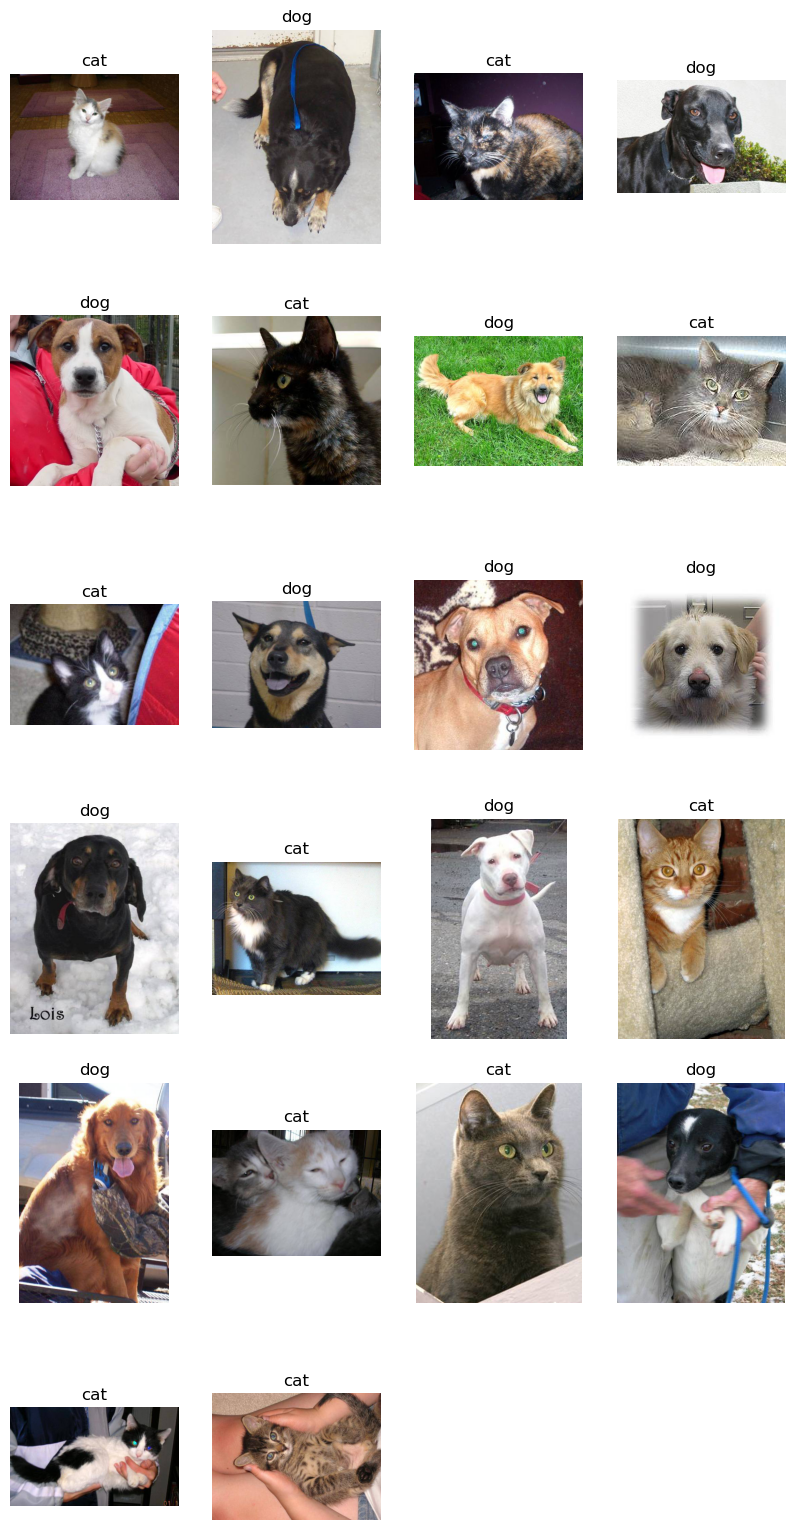

In [40]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from matplotlib import pyplot as plt
import numpy as np
import os
import random

files = []
for root, dirs, filenames in os.walk('data/catdogs/testing_set'):
    for filename in filenames:
        if filename.endswith('.jpg'):
            files.append(os.path.join(root, filename))


random.shuffle(files)

print(files)


fig1 = plt.figure(figsize=(10,20))
index = 1
images = []
for file in files:
    image = load_img(file)
    feature = modelProcess(file,model_vgg16)
    y_test_predict=model.predict(feature)
    y_test_predict = np.argmax(y_test_predict, axis=1)

    plt.subplot(6,4,index)
    plt.title('cat' if y_test_predict[0] == 0 else 'dog')
    plt.imshow(image)
    plt.axis('off')
    index += 1
plt.show()